# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using matplotlib.

In [1]:
pip install pandas matplotlib seaborn openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Excel File

In [3]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('Rate of violent victimizations by crime type 1993-2023.xlsx')

# Inspect the data
print(df.info())

# Display the first few rows of the dataframe to check the data
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   124 non-null    int64  
 1   Crime Type                             124 non-null    object 
 2   Number                                 124 non-null    int64  
 3   Number CI Lower Bound                  124 non-null    int64  
 4   Number CI Upper Bound                  124 non-null    int64  
 5   Number SE                              124 non-null    int64  
 6   Rate per 1000 persons age 12 or older  124 non-null    float64
 7   Rate CI Lower Bound                    124 non-null    float64
 8   Rate CI Upper Bound                    124 non-null    float64
 9   Rate SE                                124 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 9.8+ KB
None


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Rape/sexual assault,898239,701532,1094946,100363,4.3,3.33,5.19,0.48
1,1994,Rape/sexual assault,674291,536547,812035,70279,3.2,2.52,3.81,0.33
2,1995,Rape/sexual assault,563249,444170,682328,60756,2.6,2.07,3.17,0.28
3,1996,Rape/sexual assault,437198,334942,539454,52172,2.0,1.54,2.48,0.24
4,1997,Rape/sexual assault,553523,406600,700446,74962,2.5,1.85,3.19,0.34
5,1998,Rape/sexual assault,391101,289461,492741,51858,1.8,1.30,2.22,0.23
6,1999,Rape/sexual assault,591460,443550,739371,75466,2.6,1.98,3.29,0.34
7,2000,Rape/sexual assault,366747,266472,467023,51162,1.6,1.17,2.06,0.23
8,2001,Rape/sexual assault,476578,362493,590663,58208,2.1,1.58,2.58,0.25
9,2002,Rape/sexual assault,349805,237311,462299,57396,1.5,1.02,2.00,0.25


## Step 2: Clean and Prepare the Data

In [4]:
# Drop rows with missing values (if needed)
df.dropna(inplace=True)

# Ensure the 'Year' column is an integer and 'Value' is a float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
print(df.isnull().sum())

# Display the cleaned data
df.head(15)

Year                                     0
Crime Type                               0
Number                                   0
Number CI Lower Bound                    0
Number CI Upper Bound                    0
Number SE                                0
Rate per 1000 persons age 12 or older    0
Rate CI Lower Bound                      0
Rate CI Upper Bound                      0
Rate SE                                  0
dtype: int64


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Rape/sexual assault,898239,701532,1094946,100363,4.3,3.33,5.19,0.48
1,1994,Rape/sexual assault,674291,536547,812035,70279,3.2,2.52,3.81,0.33
2,1995,Rape/sexual assault,563249,444170,682328,60756,2.6,2.07,3.17,0.28
3,1996,Rape/sexual assault,437198,334942,539454,52172,2.0,1.54,2.48,0.24
4,1997,Rape/sexual assault,553523,406600,700446,74962,2.5,1.85,3.19,0.34
5,1998,Rape/sexual assault,391101,289461,492741,51858,1.8,1.30,2.22,0.23
6,1999,Rape/sexual assault,591460,443550,739371,75466,2.6,1.98,3.29,0.34
7,2000,Rape/sexual assault,366747,266472,467023,51162,1.6,1.17,2.06,0.23
8,2001,Rape/sexual assault,476578,362493,590663,58208,2.1,1.58,2.58,0.25
9,2002,Rape/sexual assault,349805,237311,462299,57396,1.5,1.02,2.00,0.25


## Step 3: Plot Line Graphs Rate per 1000 persons age 12 or older

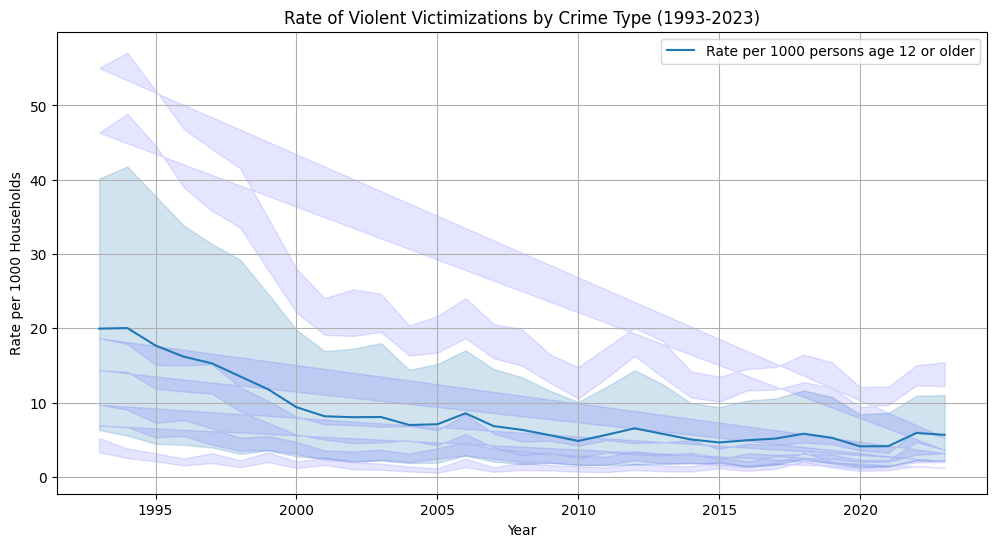

In [5]:
# Plot the 'Rate per 1000 households' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', data=df, label='Rate per 1000 persons age 12 or older')
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

# Add labels and title
plt.title('Rate of Violent Victimizations by Crime Type (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 Households')

# Display the plot with a grid and legend
plt.grid(True)
plt.legend()
plt.show()

## Step 4: Plot Multiple Series Graphs Rate per 1000 persons age 12 or older

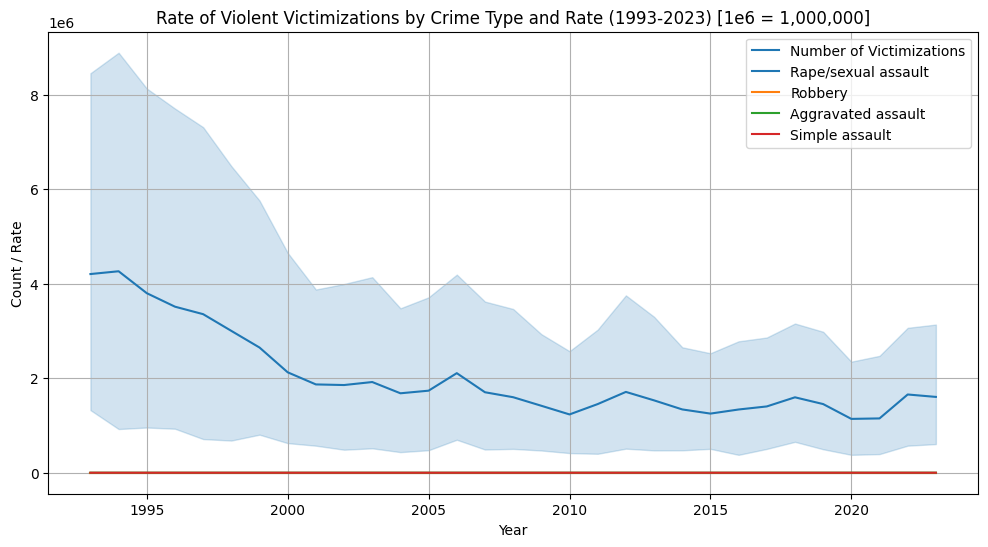

In [8]:
# Plot Multiple Series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number', data=df, label='Number of Victimizations')
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', hue='Crime Type', data=df)
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

plt.title('Rate of Violent Victimizations by Crime Type and Rate (1993-2023) [1e6 = 1,000,000]')
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.grid(True)
plt.legend()
plt.show()